## Getting the data from github raw link
Link - https://raw.githubusercontent.com/nithinbadi/Alfido-Tech/main/Iris_Classification_nithin_badi/Iris.csv

Dataset via Kaggle - https://www.kaggle.com/datasets/saurabh00007/iriscsv
- Convert to Pandas dataframe to make it accesible
- Print the shape and do some EDA on the data to understand it a little better.

In [1]:
filename = 'https://raw.githubusercontent.com/nithinbadi/Alfido-Tech/main/Iris_Classification_nithin_badi/Iris.csv'

import pandas as pd

df = pd.read_csv(filename)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
df.shape

(150, 6)

In [3]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<Axes: xlabel='Species', ylabel='count'>

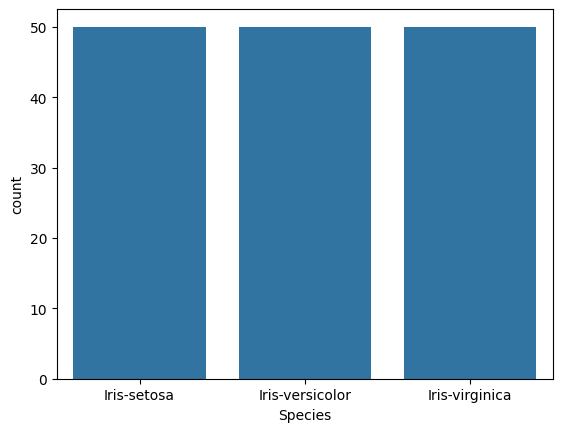

In [4]:
import seaborn as sns

sns.countplot(data=df,x='Species')

In [6]:
df.drop('Id',axis=1,inplace=True)
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

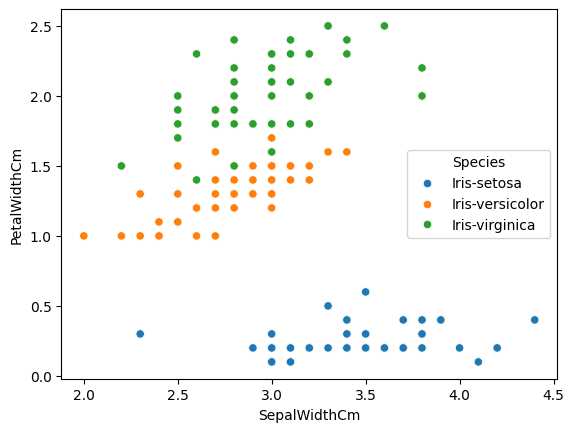

In [8]:
sns.scatterplot(x='SepalWidthCm',y='PetalWidthCm',data=df,hue='Species')

<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

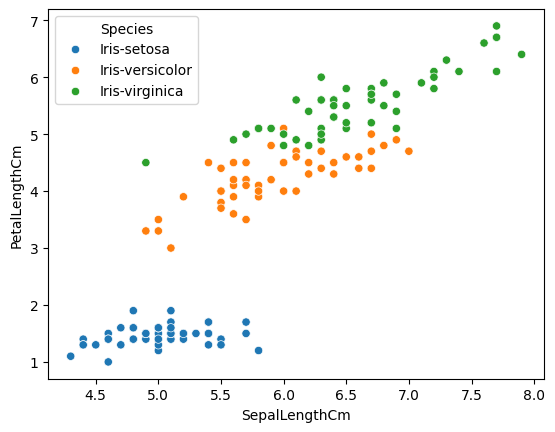

In [9]:
sns.scatterplot(x='SepalLengthCm',y='PetalLengthCm',data=df,hue='Species')

In [10]:
flowers = {0:'Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'}

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [14]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
X = df.drop('Species',axis=1)
y = df['Species']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [16]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,y_train)
svc.score(X_test,y_test)

0.9666666666666667

In [17]:
y_preds = svc.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

